### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

# 1. Open the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [3]:
complains=pd.read_csv('311-service-requests.csv', dtype='unicode')

# 2. What's even in it? (the summary)


In [4]:
complains.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [5]:
complains.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024057399216,-73.90071711703163,"(40.640024057399216, -73.90071711703163)"


In [6]:
complains.sample(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
107212,26441221,10/05/2013 12:27:00 AM,10/05/2013 12:00:00 PM,DSNY,Bronx 10,Missed Collection (All Materials),1 Missed Collection,Sidewalk,10465,4256 THROGS NECK EXPRESSWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8175095482205,-73.80659113289477,"(40.8175095482205, -73.80659113289477)"
61913,26505802,10/17/2013 01:03:40 PM,10/18/2013 07:01:32 AM,DOF,Department of Finance,DOF Literature Request,Property Tax Exemption Application for Owners ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60758,26502578,10/17/2013 06:28:27 PM,10/18/2013 01:41:05 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11420,111-15 131 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.683024575416276,-73.81138355699238,"(40.683024575416276, -73.81138355699238)"
73944,26492001,10/15/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-SUPPLY,RESIDENTIAL BUILDING,10453,1870 MORRIS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84855456598056,-73.90839032261779,"(40.84855456598056, -73.90839032261779)"
973,26595202,10/30/2013 04:11:00 PM,10/30/2013 04:11:00 PM,DSNY,BCC - Queens East,Derelict Vehicles,14 Derelict Vehicles,Street,11354,33-54 PRINCE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7648359775035,-73.83337845637031,"(40.7648359775035, -73.83337845637031)"


In [7]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

## spaces in column names are replaced with ‘_’

In [10]:
complains.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [12]:
orig_col=['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude',
       'Longitude', 'Location']

complains.columns =[column.replace(" ", "_")  for column in complains.columns]

In [13]:
complains.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

# 3. Convert the data time columns in the data set from object to datetime format

In [16]:
complains['Created_Date']=pd.to_datetime(complains['Created_Date'])
complains['Closed_Date']=pd.to_datetime(complains['Closed_Date'])
complains['Due_Date']=pd.to_datetime(complains['Due_Date'])
complains['Resolution_Action_Updated_Date']=pd.to_datetime(complains['Resolution_Action_Updated_Date'])

# 4. Drop all the columns where most of the rows are null. Think logically

In [17]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

In [22]:
complains.drop(['Landmark','School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment','Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Terminal_Name'], axis=1, inplace=True)

In [23]:
complains.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

# 5. Select the column name `Complaint_Type`,  
## find out no. of unique values in the series or data, 
## print top 5 rows of the data

In [24]:
complains['Complaint_Type'].nunique()

165

In [25]:
complains['Complaint_Type'].head()

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint_Type, dtype: object

# 6. Selecting multiple columns
What if we just want to know the complaint type and the borough, but not the rest of the information?

In [26]:
complains.loc[:10, ['Complaint_Type', 'Borough']]

,Complaint_Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 7. Rename the `Borough` to `District`

In [27]:
complains=complains.rename(columns={'Borough':'District'})

In [28]:
complains.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'District',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

# 8. What's the most common complaint type?
display top 10 most common compalin


In [33]:
complains['Complaint_Type'].value_counts().head(10)

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint_Type, dtype: int64

In [31]:
complains['Complaint_Type'].mode()[0]

'HEATING'

#  Plot the top 10 most common compalin

From this graph we can see that the most common complaint was heating


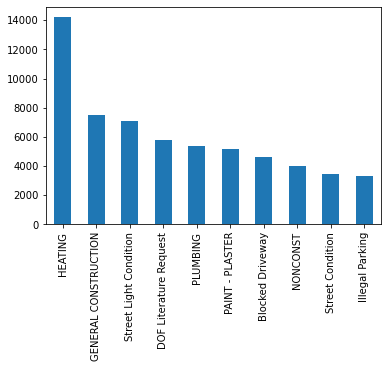

In [48]:
complaints = complains['Complaint_Type'].value_counts()
complaints[:10].plot(kind='bar')
print('From this graph we can see that the most common complaint was heating')

# 9. What's the most common `District` the complain came?
display top 10 most and plot them out

In [47]:
comp = complains['District'].value_counts().head(10)
print('From the finding below we can see that complaints came most often from the Brooklyn District')
print("")
print(comp)

From the finding below we can see that complaints came most often from the Brooklyn District

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: District, dtype: int64


# 10. Select only top 10 Illegal Parking complains at  Queens district and save it to `new_complaint`. You can use `query`

In [42]:
new_complaint = complains.query("Complaint_Type == 'Illegal Parking' & District == 'QUEENS'").head(20)
new_complaint

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location
1,26593698,2013-10-31 02:01:04,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
116,26591037,2013-10-30 23:20:57,2013-10-31 02:16:39,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.67347065165803,-73.8511307325341,"(40.67347065165803, -73.8511307325341)"
117,26592954,2013-10-30 23:20:26,2013-10-31 01:18:56,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.73996897148448,-73.7768682381755,"(40.73996897148448, -73.7768682381755)"
140,26592551,2013-10-30 23:01:49,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.726633034808366,-73.8835552085296,"(40.726633034808366, -73.8835552085296)"
186,26591575,2013-10-30 22:33:28,2013-10-30 23:06:35,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.608860268959695,-73.75593130211928,"(40.608860268959695, -73.75593130211928)"
193,26594762,2013-10-30 22:31:22,2013-10-31 02:28:02,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11356,20-42 125 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.78141708195395,-73.84323796414719,"(40.78141708195395, -73.84323796414719)"
253,26592844,2013-10-30 21:46:18,2013-10-30 22:39:09,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.7086929311143,-73.8753699708503,"(40.7086929311143, -73.8753699708503)"
284,26592833,2013-10-30 21:27:13,2013-10-31 00:44:51,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11433,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.70241414798045,-73.79252032151341,"(40.70241414798045, -73.79252032151341)"
293,26594635,2013-10-30 21:22:34,2013-10-30 22:29:36,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11361,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.75439605091989,-73.77719529050601,"(40.75439605091989, -73.77719529050601)"
319,26592819,2013-10-30 21:10:54,2013-10-31 01:50:30,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11413,185-11 WILLIAMSON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.680211769230816,-73.75749088965092,"(40.680211769230816, -73.75749088965092)"


# 11 Filter top 3 columns `Complaint_Type,District, Created_Date,Descriptor` from the new_complaint

In [51]:
new_complaint = new_complaint.loc[:, ['Complaint_Type', 'District', 'Created_Date', 'Descriptor']]

In [52]:
new_complaint

,Complaint_Type,District,Created_Date,Descriptor
1,Illegal Parking,QUEENS,2013-10-31 02:01:04,Commercial Overnight Parking
116,Illegal Parking,QUEENS,2013-10-30 23:20:57,Blocked Hydrant
117,Illegal Parking,QUEENS,2013-10-30 23:20:26,Posted Parking Sign Violation
140,Illegal Parking,QUEENS,2013-10-30 23:01:49,Commercial Overnight Parking
186,Illegal Parking,QUEENS,2013-10-30 22:33:28,Commercial Overnight Parking
193,Illegal Parking,QUEENS,2013-10-30 22:31:22,Commercial Overnight Parking
253,Illegal Parking,QUEENS,2013-10-30 21:46:18,Commercial Overnight Parking
284,Illegal Parking,QUEENS,2013-10-30 21:27:13,Blocked Sidewalk
293,Illegal Parking,QUEENS,2013-10-30 21:22:34,Commercial Overnight Parking
319,Illegal Parking,QUEENS,2013-10-30 21:10:54,Commercial Overnight Parking


# 12 Save `new_complaint` dataframe to CSV format and load it back to verify the data

In [53]:
new_complaint.to_csv("new_complaint.csv", index=False)

In [54]:
check=pd.read_csv('new_complaint.csv', index_col=0)
check

,District,Created_Date,Descriptor
Complaint_Type,,,
Illegal Parking,QUEENS,2013-10-31 02:01:04,Commercial Overnight Parking
Illegal Parking,QUEENS,2013-10-30 23:20:57,Blocked Hydrant
Illegal Parking,QUEENS,2013-10-30 23:20:26,Posted Parking Sign Violation
Illegal Parking,QUEENS,2013-10-30 23:01:49,Commercial Overnight Parking
Illegal Parking,QUEENS,2013-10-30 22:33:28,Commercial Overnight Parking
Illegal Parking,QUEENS,2013-10-30 22:31:22,Commercial Overnight Parking
Illegal Parking,QUEENS,2013-10-30 21:46:18,Commercial Overnight Parking
Illegal Parking,QUEENS,2013-10-30 21:27:13,Blocked Sidewalk
Illegal Parking,QUEENS,2013-10-30 21:22:34,Commercial Overnight Parking
